# Batched Evaluation Demo

In [1]:
import pyhf
import numpy as np

data = {
    'signal_data': [12.0, 11.0],
    'bkg_data': [50.0, 52.0],
    'bkg_uncerts': [3.0, 7.0]
}

pdf = pyhf.simplemodels.hepdata_like(**data)
nominal_data = pdf.expected_data(pdf.config.suggested_init())
print(pdf.logpdf(pdf.config.suggested_init(),nominal_data))
print(pdf.config.suggested_init())

[-12.63410988]
[1.0, 1.0, 1.0]


In [2]:
grid = np.mgrid[0.5:2.0:101j,0.5:2.0:101j]
points = np.moveaxis(grid,0,2).reshape(101**2,2)


pars = np.asarray([pdf.config.suggested_init()]*101**2)
pars[:,1:] = points

pdf = pyhf.simplemodels.hepdata_like(
    batch_size = 101**2, **data
)

In [3]:
values = pdf.logpdf(pars,nominal_data)
values = values.reshape(101,101)

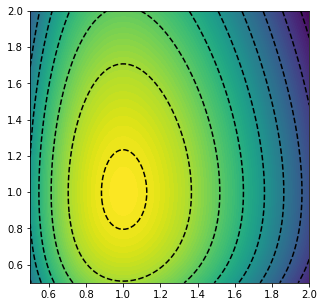

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.contourf(grid[0],grid[1],values, levels = 100)
plt.contour(grid[0],grid[1],values, levels = 10, colors = 'k')
plt.gcf().set_size_inches(5,5)
